In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#to ignore warnings in output
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from scipy.stats import chi2_contingency

In [2]:
gaming = pd.read_csv('gaming.csv')
gaming.head(8)

,Recommended,hours,Date,numFoundHelpful,numFoundFunny,NumOfComments,GameName
0,1,3,Posted: 24 May,840,39,9,"Warhammer 40,000: Boltgun"
1,1,2,Posted: 24 May,2462,32,0,"Warhammer 40,000: Boltgun"
2,1,2,Posted: 23 May,1560,461,0,"Warhammer 40,000: Boltgun"
3,1,9,Posted: 26 May,366,72,0,"Warhammer 40,000: Boltgun"
4,1,7,Posted: 23 May,746,15,0,"Warhammer 40,000: Boltgun"
5,1,7,Posted: 23 May,1183,25,17,"Warhammer 40,000: Boltgun"
6,1,10,Posted: 26 May,386,19,9,"Warhammer 40,000: Boltgun"
7,1,8,Posted: 24 May,326,3,1,"Warhammer 40,000: Boltgun"


In [3]:
# Present a statistical description of the numerical columns.
gaming.describe()

,Recommended,hours,numFoundHelpful,numFoundFunny,NumOfComments
count,200.00000,200.000000,200.000000,200.000000,200.000000
mean,0.79000,1358.795000,1644.740000,425.450000,24.040000
std,0.40833,3505.836267,2152.051244,843.650489,49.411902
min,0.00000,0.000000,77.000000,1.000000,0.000000
25%,1.00000,16.000000,480.500000,25.000000,0.000000
50%,1.00000,100.500000,901.500000,127.000000,3.000000
75%,1.00000,1185.500000,1677.250000,518.750000,25.250000
max,1.00000,33234.000000,12463.000000,9092.000000,411.000000


In [4]:
#Present a statistical description of the categorical columns.
gaming.describe(include=['O'])

,Date,GameName
count,200,200
unique,151,18
top,Posted: 24 May,"Warhammer 40,000: Boltgun"
freq,8,20


In [6]:
#count the Recommended and it's percentage 
c = gaming.Recommended.value_counts()
p = gaming.Recommended.value_counts(normalize=True) * 100
counts_df = pd.concat([c, p], axis=1, keys=['counts', '%'])
counts_df

,counts,%
1,158,79.0
0,42,21.0


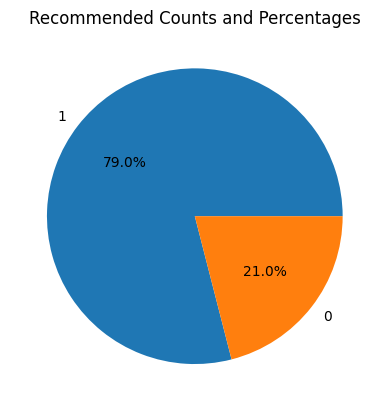

In [7]:
# Create pie chart
plt.pie(counts_df['counts'], labels=counts_df.index, autopct='%1.1f%%')

# Set plot title
plt.title('Recommended Counts and Percentages')

# Show plot
plt.show()

In [8]:
#count the hours and it's percentage 
c = gaming.hours.value_counts()
p = gaming.hours.value_counts(normalize=True) * 100
counts_df = pd.concat([c, p], axis=1, keys=['counts', '%'])

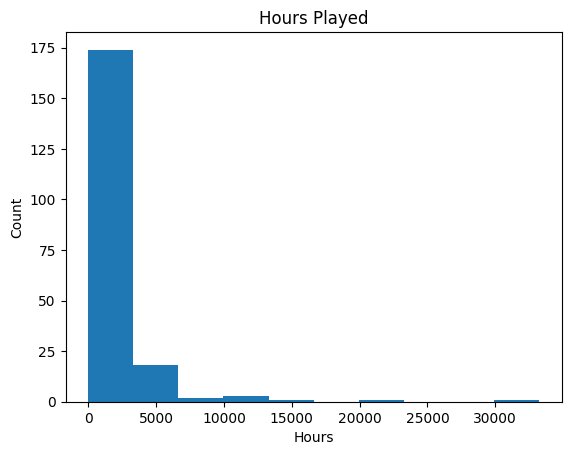

In [10]:

plt.hist(gaming.hours, bins=10)

# Set plot title, x-label, and y-label
plt.title('Hours Played')
plt.xlabel('Hours')
plt.ylabel('Count')

# Show plot
plt.show()

In [ ]:
#count the numFoundHelpful and it's percentage
c = gaming.numFoundHelpful.value_counts()
p = gaming.numFoundHelpful.value_counts(normalize=True) * 100
pd.concat([c,p], axis=1, keys=['counts', '%']) 

,counts,%
840,2,1.0
505,2,1.0
347,2,1.0
1324,2,1.0
739,2,1.0
...,...,...
3763,1,0.5
1883,1,0.5
6122,1,0.5
2967,1,0.5


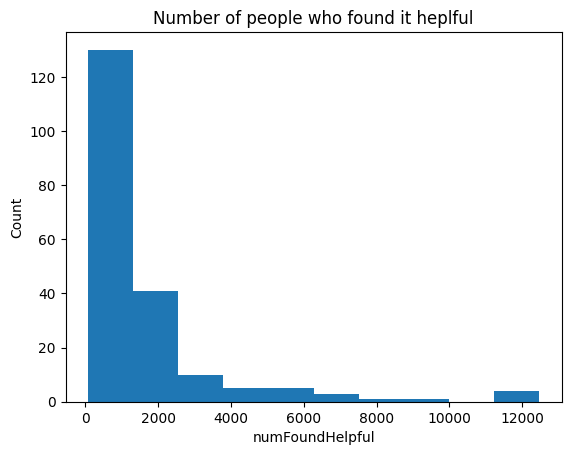

In [11]:
plt.hist(gaming.numFoundHelpful, bins=10)

# Set plot title, x-label, and y-label
plt.title('Number of people who found it heplful')
plt.xlabel('numFoundHelpful')
plt.ylabel('Count')

# Show plot
plt.show()

In [ ]:
#count the numFoundFunny and it's percentage 
c = gaming.numFoundFunny.value_counts()
p = gaming.numFoundFunny.value_counts(normalize=True) * 100
pd.concat([c,p], axis=1, keys=['counts', '%']) 

,counts,%
3,7,3.5
97,4,2.0
737,4,2.0
9,4,2.0
15,4,2.0
...,...,...
198,1,0.5
113,1,0.5
163,1,0.5
658,1,0.5


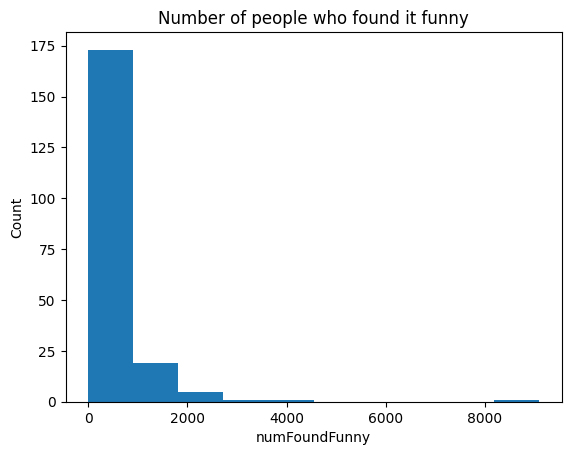

In [12]:
plt.hist(gaming.numFoundFunny, bins=10)

# Set plot title, x-label, and y-label
plt.title('Number of people who found it funny')
plt.xlabel('numFoundFunny')
plt.ylabel('Count')

# Show plot
plt.show()

In [ ]:
#count the NumOfComments and it's percenatage
c = gaming.NumOfComments.value_counts()
p = gaming.NumOfComments.value_counts(normalize=True) * 100
pd.concat([c,p], axis=1, keys=['counts', '%']) 

,counts,%
0,92,46.0
1,7,3.5
9,6,3.0
6,6,3.0
7,5,2.5
...,...,...
25,1,0.5
181,1,0.5
191,1,0.5
51,1,0.5


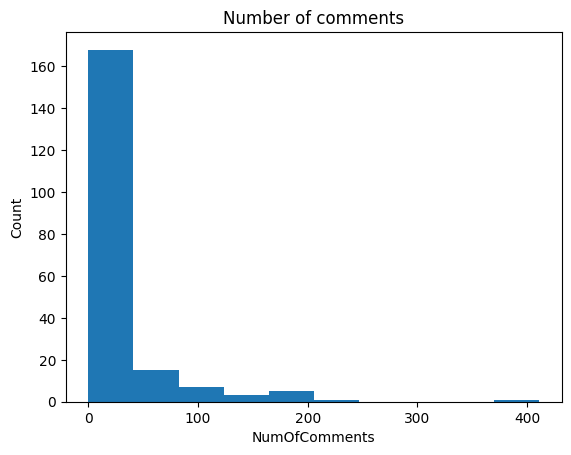

In [13]:
plt.hist(gaming.NumOfComments, bins=10)

# Set plot title, x-label, and y-label
plt.title('Number of comments')
plt.xlabel('NumOfComments')
plt.ylabel('Count')

# Show plot
plt.show()

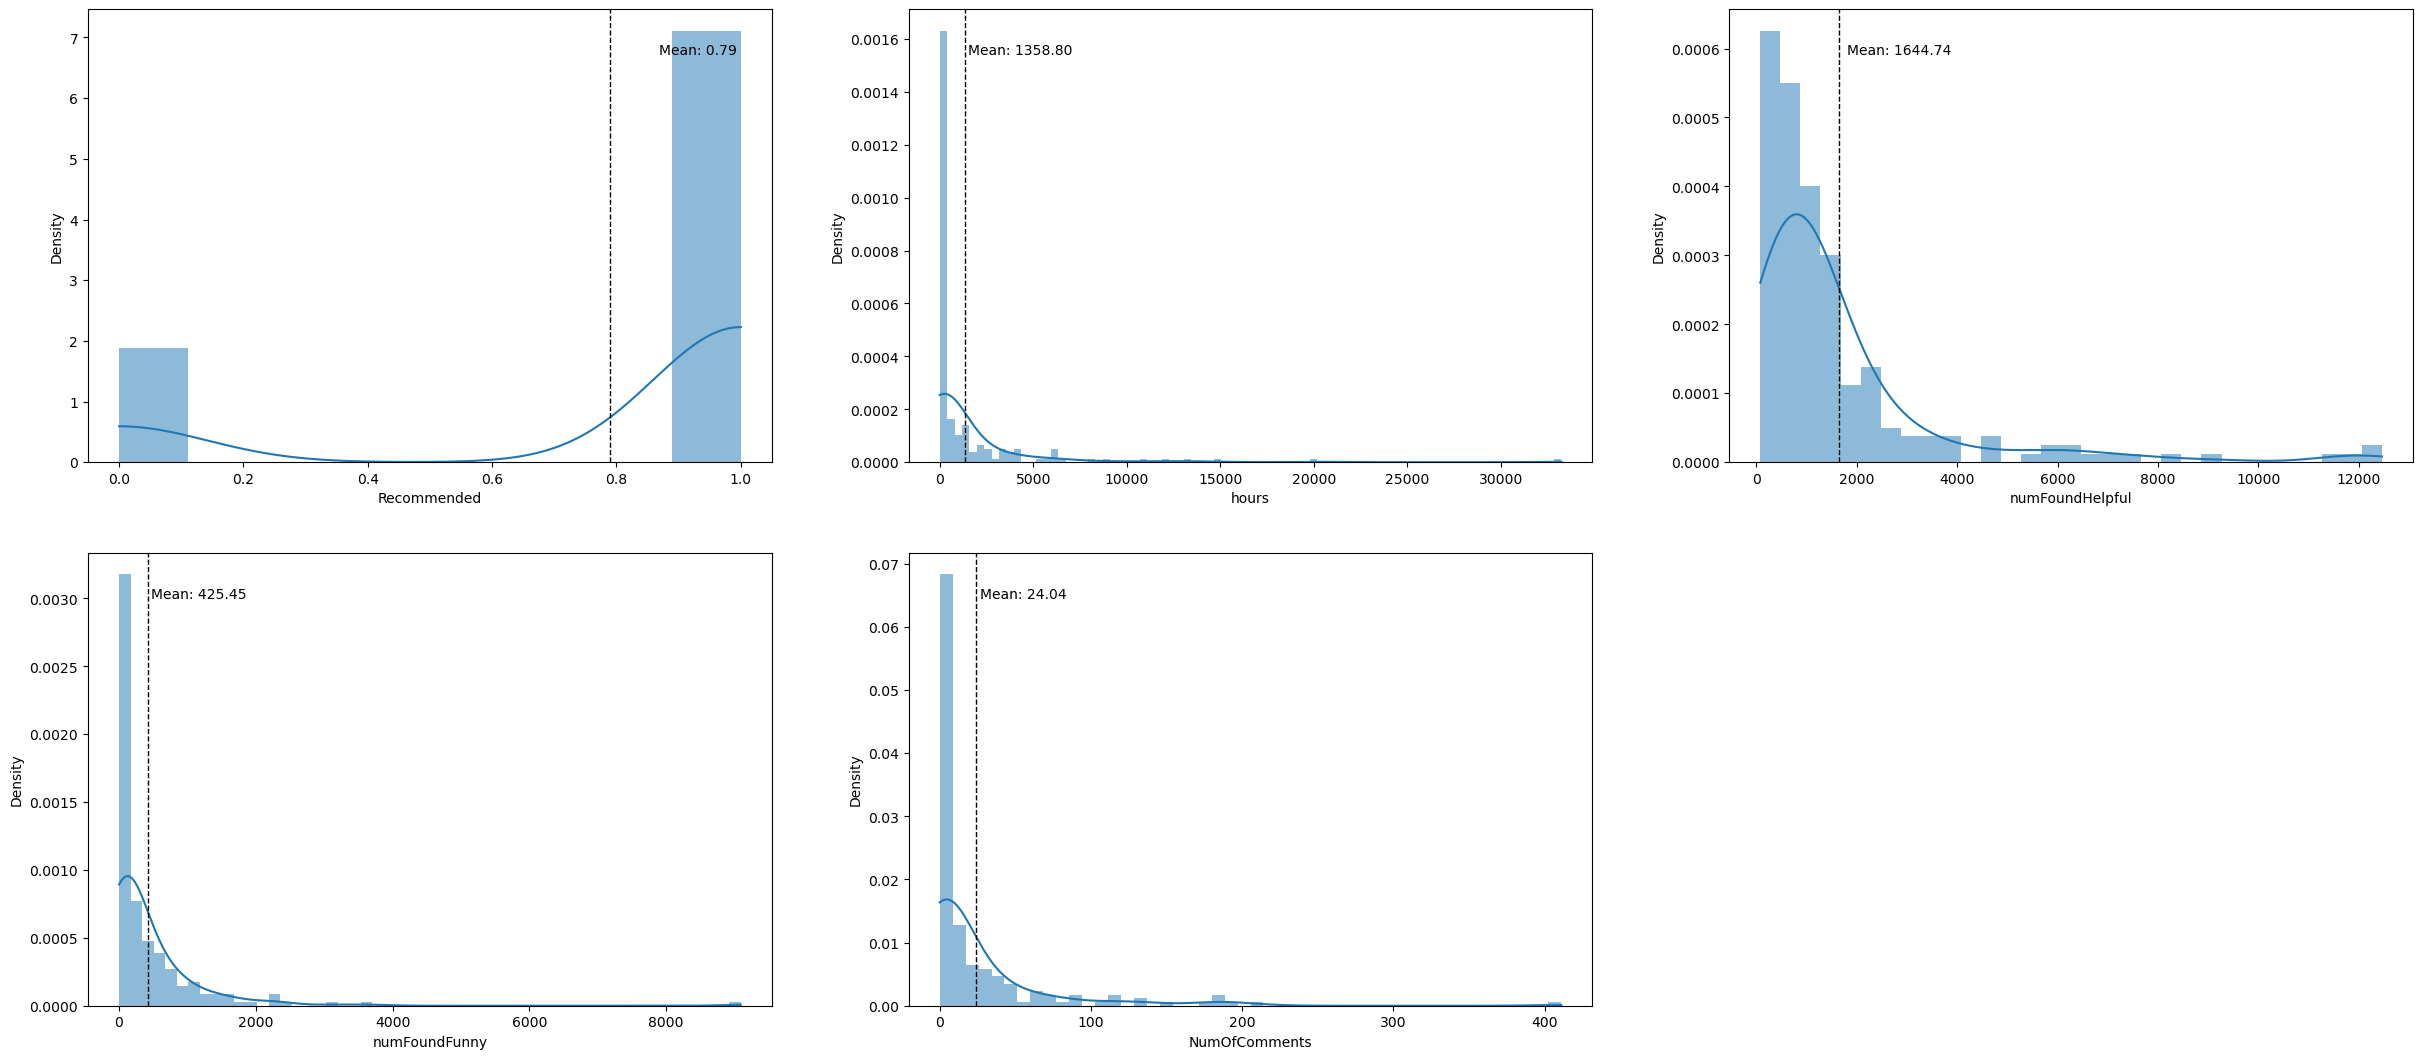

In [ ]:
#the graphs represents the quantitative columns
conti_features = ['Recommended', 'hours', 'numFoundHelpful', 'numFoundFunny', 'NumOfComments']
np.random.seed(6789)
    
fig = plt.figure(figsize=(30, 20))
j=0;
for col in conti_features:
    fig.add_subplot(3,3,j + 1)
    sns.histplot(gaming[col].dropna(), kde=True, stat="density", linewidth=0)
    plt.axvline(gaming[col].mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(gaming[col].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(gaming[col].mean()))
    j += 1
    
    
plt.show();

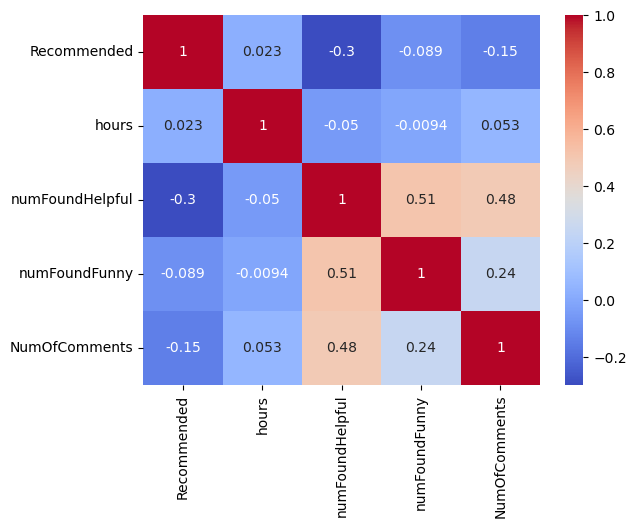

In [ ]:
sns.heatmap(gaming.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
corr = gaming.corr()['Recommended']
print(corr)

Recommended        1.000000
hours              0.022523
numFoundHelpful   -0.298311
numFoundFunny     -0.089421
NumOfComments     -0.145531
Name: Recommended, dtype: float64


<Axes: xlabel='Recommended', ylabel='NumOfComments'>

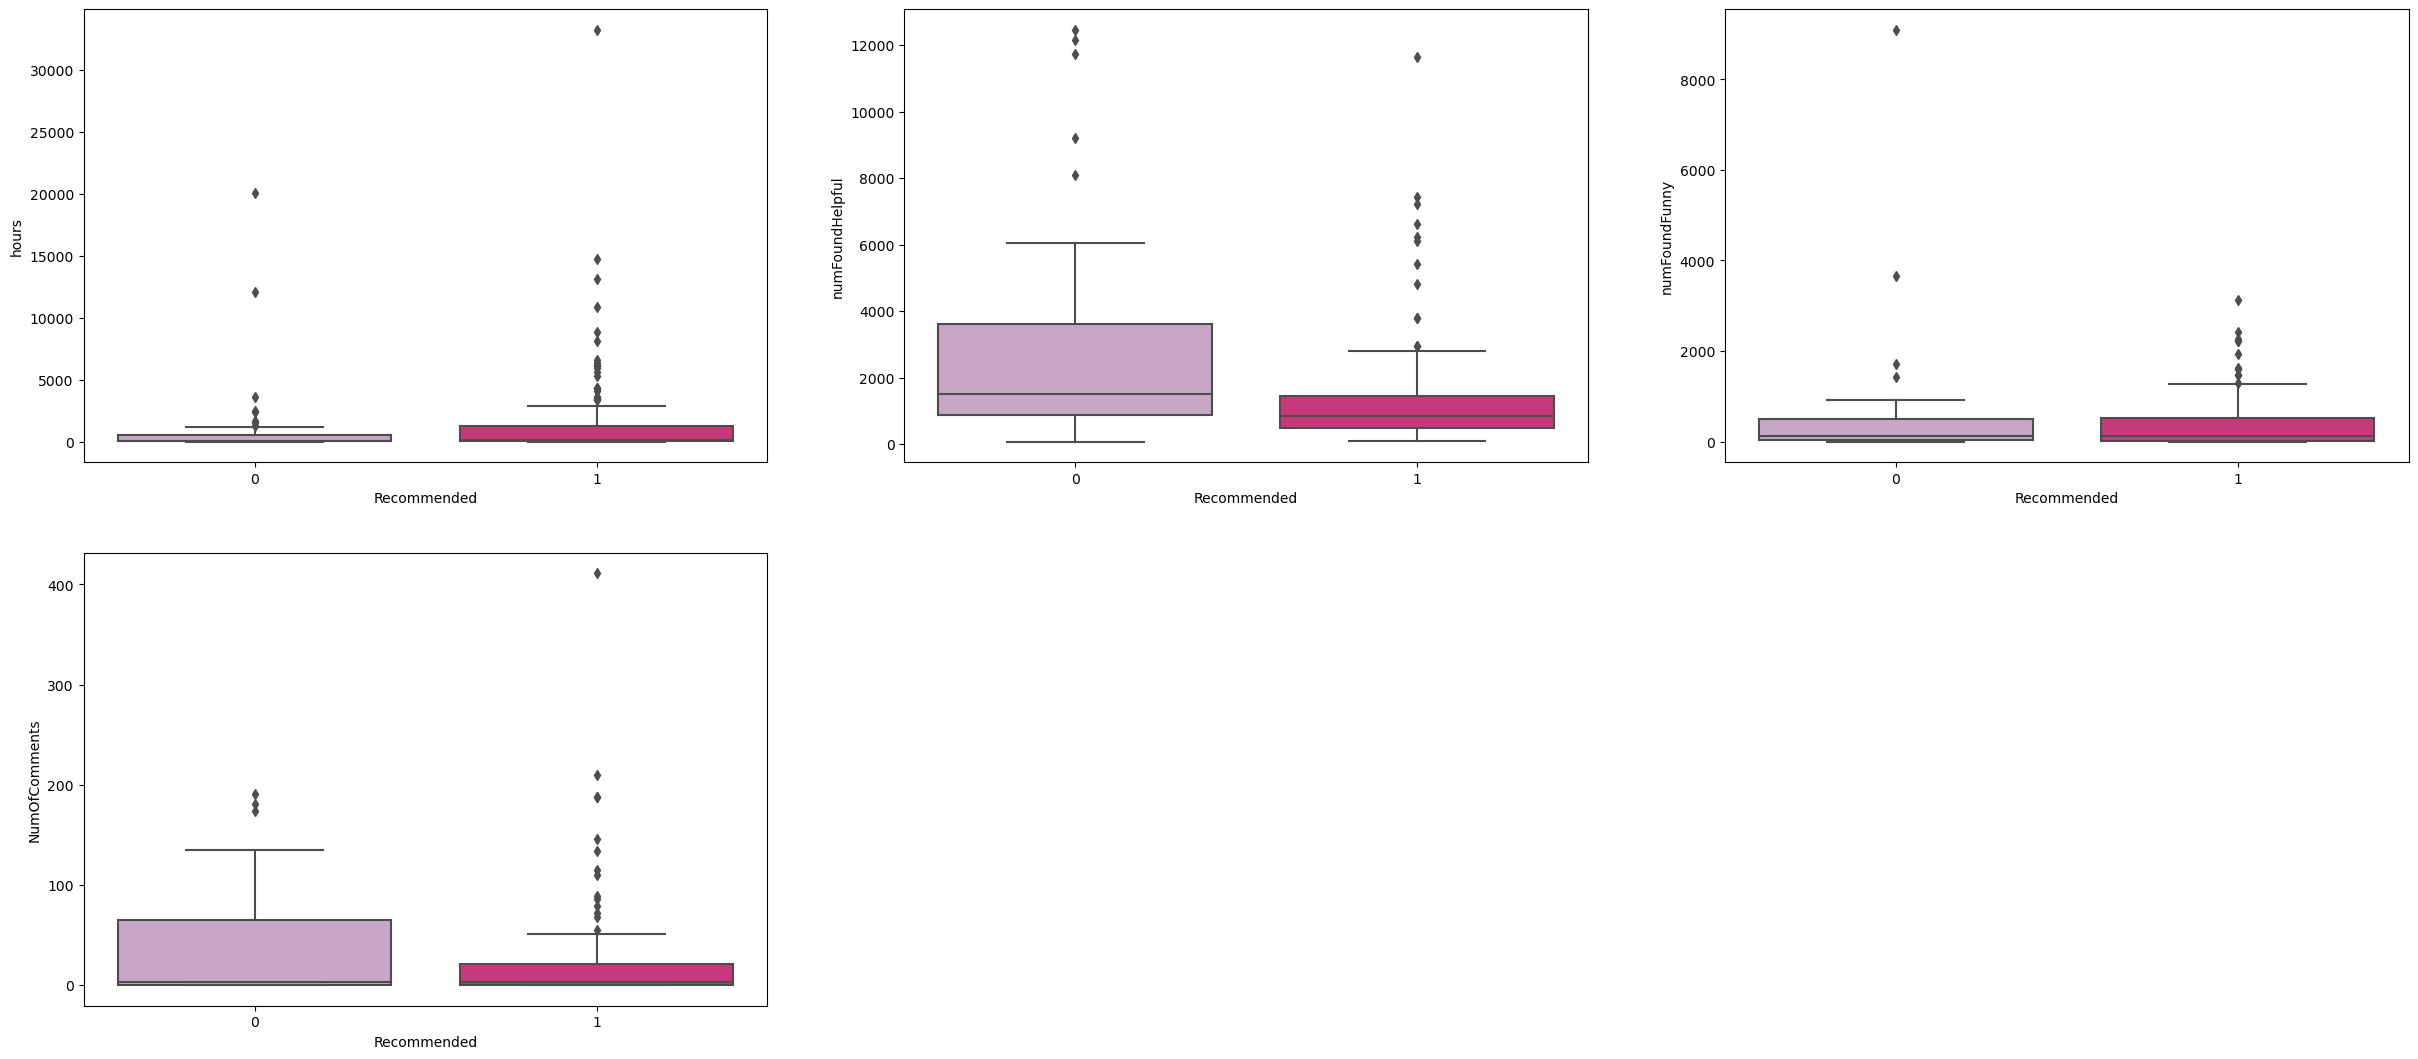

In [ ]:
fig = plt.figure(figsize=(30, 20))

fig.add_subplot(3,3,1)
sns.boxplot(x="Recommended", y="hours", data=gaming, palette='PuRd')
fig.add_subplot(3,3,2)
sns.boxplot(x="Recommended", y="numFoundHelpful", data=gaming,palette='PuRd')
fig.add_subplot(3,3,3)
sns.boxplot(y='numFoundFunny',x='Recommended',data=gaming,palette='PuRd')
fig.add_subplot(3,3,4)
sns.boxplot(y='NumOfComments',x='Recommended',data=gaming,palette='PuRd')

In [ ]:
#Preparing the data for the model

gameModel = gaming.drop('Date',axis=1)

gameModel['GameName'].replace('Warhammer 40,000: Boltgun',1, inplace=True)
gameModel['GameName'].replace('Counter-Strike: Global Offensive',2, inplace=True)
gameModel['GameName'].replace('Destiny 2',3, inplace=True)
gameModel['GameName'].replace('The Outlast Trials',4, inplace=True)
gameModel['GameName'].replace('EA SPORTS™ FIFA 23',5, inplace=True)
gameModel['GameName'].replace('Starship Troopers: Extermination',6, inplace=True)
gameModel['GameName'].replace('PUBG: BATTLEGROUNDS',7, inplace=True)
gameModel['GameName'].replace('Apex Legends',8, inplace=True)
gameModel['GameName'].replace('Battlefield™ 2042',9, inplace=True)
gameModel['GameName'].replace('Cities: Skylines',10, inplace=True)
gameModel['GameName'].replace('Total War: WARHAMMER II',11, inplace=True)
gameModel['GameName'].replace('Sid Meier\'s Civilization VI',12, inplace=True)
gameModel['GameName'].replace('Dota 2',13, inplace=True)
gameModel['GameName'].replace('Hogwarts Legacy',14, inplace=True)
gameModel['GameName'].replace('V Rising',15, inplace=True)
gameModel['GameName'].replace('Tom Clancy\'s Rainbow Six Siege',16, inplace=True)
gameModel['GameName'].replace('Black Desert',17, inplace=True)
gameModel['GameName'].replace('Summoners War: Chronicles',18, inplace=True)

X = gameModel.drop('Recommended',axis=1)
y = gameModel['Recommended']

from sklearn.model_selection import train_test_split
#library to split the data

X_train, X_test, y_train, y_test = train_test_split(X, y)
print (X_train.shape,X_test.shape,y_train.shape, y_test.shape)


(150, 5) (50, 5) (150,) (50,)


In [ ]:
# CLassifier Model

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Initilize Logistic Regression model
logreg = LogisticRegression() 
#fitting the model = training the model
logreg.fit(X_train, y_train) 

#Print accuracy based on test data
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Initilize SVM model
SVM = SVC(gamma='auto')
#fitting the model = training the model
SVM.fit(X_train, y_train)
#Print accuracy based on test data
print('Accuracy of SVM classifier on test set: {:.2f}'.format(SVM.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.82


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Initilize KNN model
KNN = KNeighborsClassifier()
#fitting the model = training the model
KNN.fit(X_train, y_train)
#Print accuracy based on test data
print('Accuracy of KNN classifier on test set: {:.2f}'.format(KNN.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.82


In [ ]:
#Evaluate LR model using test set
LR_prediction = logreg.predict(X_test)
#Compare actual vs. predicted
confusion_matrix = confusion_matrix(y_test.tolist(), LR_prediction.tolist())
print(confusion_matrix)

[[ 0  9]
 [ 1 40]]


In [ ]:
#To clarify the confusion matrix results for Logistic Regression model
print('TN - True Negative {}'.format(confusion_matrix[0,0]))
print('FP - False Positive {}'.format(confusion_matrix[0,1]))
print('FN - False Negative {}'.format(confusion_matrix[1,0]))
print('TP - True Positive {}'.format(confusion_matrix[1,1]))
print('Misclassification Rate: {}'.format(np.divide(np.sum([confusion_matrix[0,1],confusion_matrix[1,0]]),np.sum(confusion_matrix))))

TN - True Negative 0
FP - False Positive 9
FN - False Negative 1
TP - True Positive 40
Misclassification Rate: 0.2


In [ ]:
#To measure the quality of predictions from Logistic Regression model.
print(classification_report(y_test, LR_prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.82      0.98      0.89        41

    accuracy                           0.80        50
   macro avg       0.41      0.49      0.44        50
weighted avg       0.67      0.80      0.73        50



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Evaluate model using test set
SVM_prediction = SVM.predict(X_test)
#Compare actual vs. predicted
confusion_matrix = confusion_matrix(y_test, SVM_prediction)
print(confusion_matrix)

[[ 0  9]
 [ 0 41]]


In [ ]:
#To clarify the confusion matrix results for SVM model
print('TN - True Negative {}'.format(confusion_matrix[0,0]))
print('FP - False Positive {}'.format(confusion_matrix[0,1]))
print('FN - False Negative {}'.format(confusion_matrix[1,0]))
print('TP - True Positive {}'.format(confusion_matrix[1,1]))
print('Misclassification Rate: {}'.format(np.divide(np.sum([confusion_matrix[0,1],confusion_matrix[1,0]]),np.sum(confusion_matrix))))

TN - True Negative 1
FP - False Positive 8
FN - False Negative 1
TP - True Positive 40
Misclassification Rate: 0.18


In [ ]:
#To measure the quality of predictions from SVM model.
print(classification_report(y_test, SVM_prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.82      1.00      0.90        41

    accuracy                           0.82        50
   macro avg       0.41      0.50      0.45        50
weighted avg       0.67      0.82      0.74        50



/Users/alanoud/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alanoud/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alanoud/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Evaluate model using test set
KNN_prediction = KNN.predict(X_test)
#Compare actual vs. predicted
confusion_matrix = confusion_matrix(y_test, KNN_prediction)
print(confusion_matrix)

[[ 1  8]
 [ 1 40]]


In [ ]:
#To clarify the confusion matrix results for KNN model
print('TN - True Negative {}'.format(confusion_matrix[0,0]))
print('FP - False Positive {}'.format(confusion_matrix[0,1]))
print('FN - False Negative {}'.format(confusion_matrix[1,0]))
print('TP - True Positive {}'.format(confusion_matrix[1,1]))
print('Misclassification Rate: {}'.format(np.divide(np.sum([confusion_matrix[0,1],confusion_matrix[1,0]]),np.sum(confusion_matrix))))

TN - True Negative 1
FP - False Positive 8
FN - False Negative 1
TP - True Positive 40
Misclassification Rate: 0.18


In [ ]:
#To measure the quality of predictions from KNN model.
print(classification_report(y_test, KNN_prediction))

              precision    recall  f1-score   support

           0       0.50      0.11      0.18         9
           1       0.83      0.98      0.90        41

    accuracy                           0.82        50
   macro avg       0.67      0.54      0.54        50
weighted avg       0.77      0.82      0.77        50



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(C= 1, gamma=0.0001, kernel= 'rbf')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) #Repeats Stratified K-Fold n times
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())) #the mean accuracy for each model and the SD

LR: 0.753333 (0.066999)
KNN: 0.773333 (0.044222)
SVM: 0.760000 (0.044222)


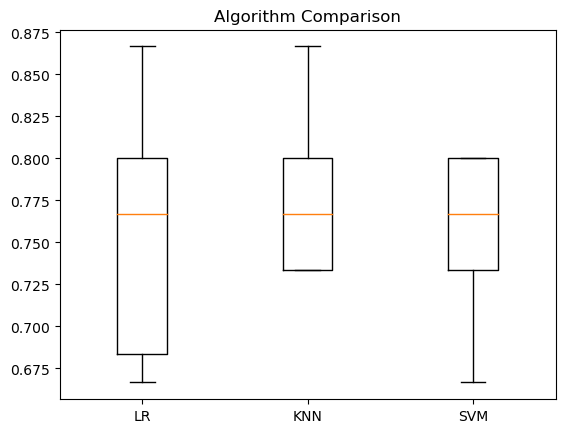

In [ ]:
#Compare models' accuracy 
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

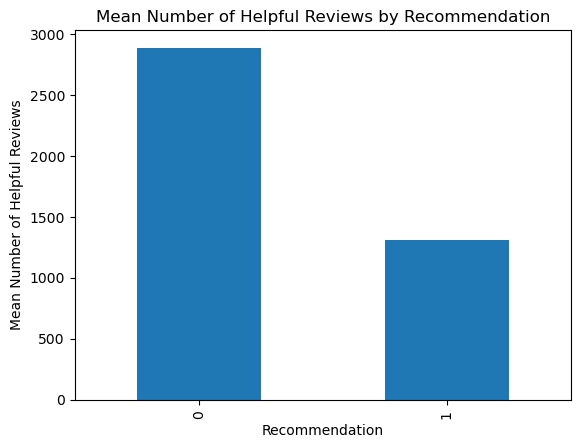

In [ ]:
# Q1
grouped = gaming.groupby('Recommended')['numFoundHelpful'].mean()  

grouped.plot(kind='bar')

plt.title('Mean Number of Helpful Reviews by Recommendation')
plt.xlabel('Recommendation')
plt.ylabel('Mean Number of Helpful Reviews')

# Show plot
plt.show()

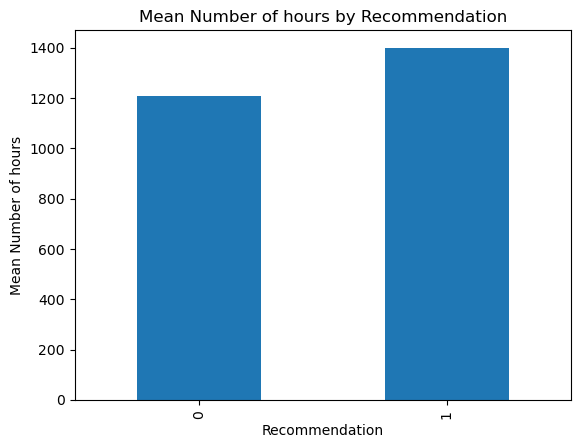

In [ ]:
# Q2
grouped = gaming.groupby('Recommended')['hours'].mean()  

grouped.plot(kind='bar')

plt.title('Mean Number of hours by Recommendation')
plt.xlabel('Recommendation')
plt.ylabel('Mean Number of hours')

# Show plot
plt.show()

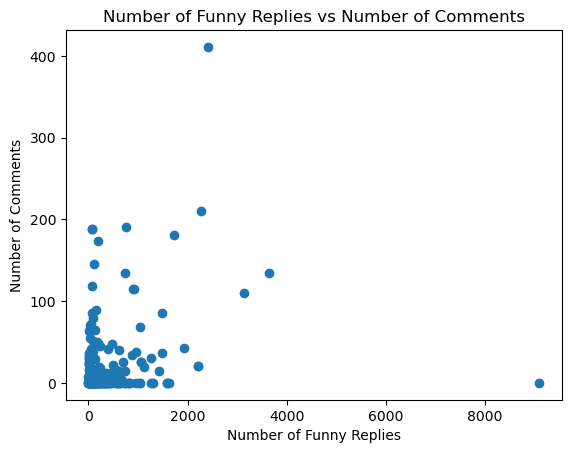

In [ ]:
# Q3
plt.scatter(gaming['numFoundFunny'], gaming['NumOfComments'])

# Set plot title and axis labels
plt.title('Number of Funny Replies vs Number of Comments')
plt.xlabel('Number of Funny Replies')
plt.ylabel('Number of Comments')

# Show plot
plt.show()

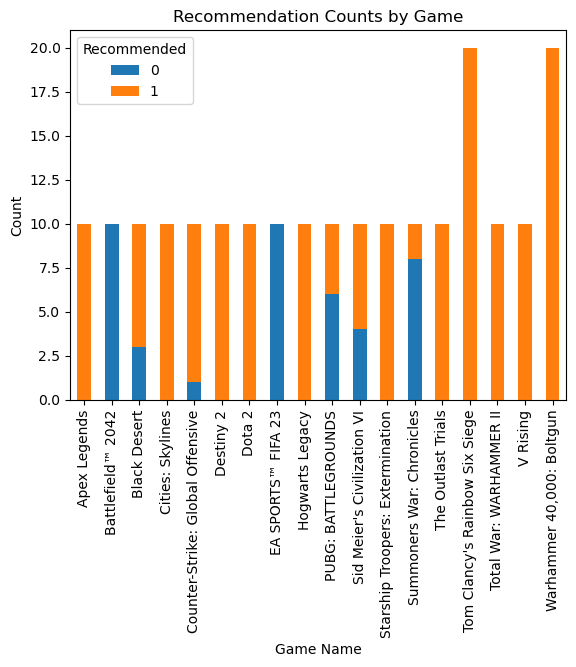

In [ ]:
#Q4
recommendation_counts = gaming.groupby(['GameName', 'Recommended']).size().unstack(fill_value=0)

# Create bar chart
recommendation_counts.plot(kind='bar', stacked=True)

# Set plot title and axis labels
plt.title('Recommendation Counts by Game')
plt.xlabel('Game Name')
plt.ylabel('Count')

# Show plot
plt.show()

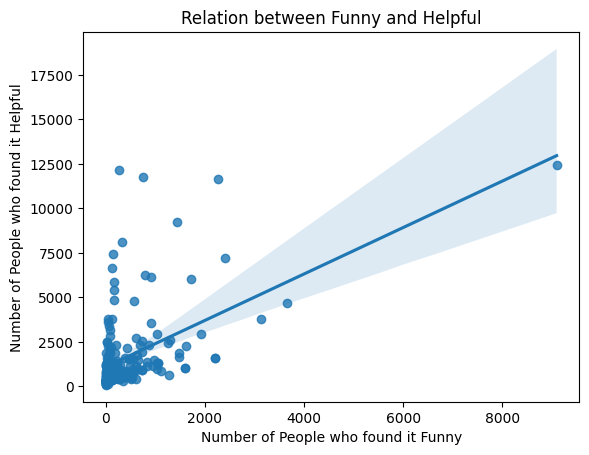

In [14]:
#Q5
sns.regplot(x='numFoundFunny', y='numFoundHelpful', data=gaming)

# Set plot title, x-label, and y-label
plt.title('Relation between Funny and Helpful')
plt.xlabel('Number of People who found it Funny')
plt.ylabel('Number of People who found it Helpful')

# Show plot
plt.show()